In [1]:
# Run the command below if necessary, for example with Google Colab
#!python3 -m pip install mxnet-cu110

In [2]:
# Global Libraries
import collections
import gluoncv as gcv
from gluoncv.utils.metrics.segmentation import SegmentationMetric
from importlib import reload
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import os
from sklearn import metrics
import time

# MXNet ND-Arrays with Numpy notation
#mx.npx.set_np()

# Local Libraries
import pedestrian
import utils

# GPU mode
ctx = mx.gpu()

/home/andres/.local/lib/python3.8/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [3]:
# Penn-Fudan Pedestrian Dataset
# https://www.cis.upenn.edu/~jshi/ped_html/

reload(pedestrian)

pedestrian_path = os.getcwd()
pedestrian_dataset = pedestrian.PedestrianDataset(pedestrian_path,
                                                  is_segmentation_task=True)

Read 170 images with 423 pedestrians


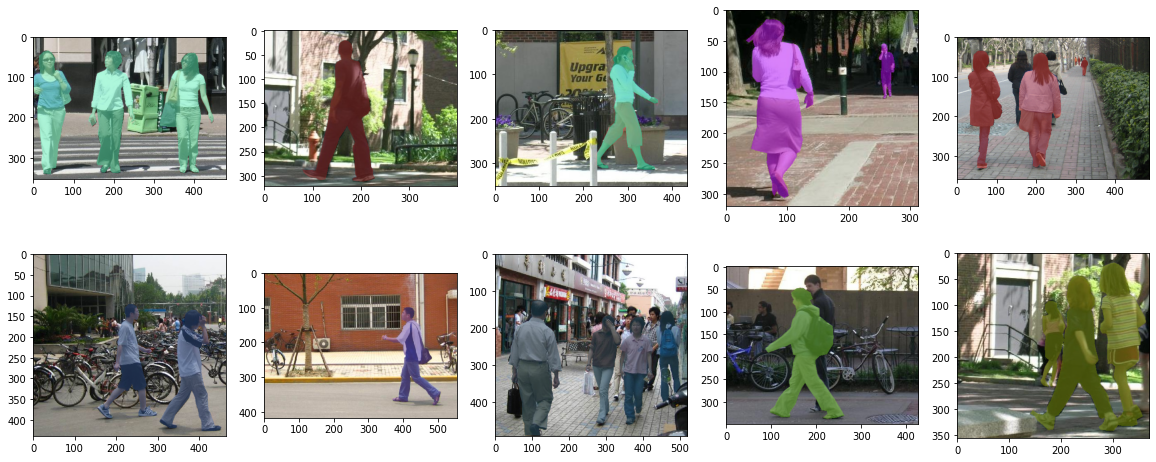

In [4]:
# Display 10 images from the dataset
# 5 x 2 grid
num_images_to_plot = 10
num_columns = 5

fig = plt.figure(figsize=(20, 8))

images_plotted = 0

number_pedestrians = 0

for (X, y) in pedestrian_dataset:
        
    # Format inputs
    image = X
    gt_mask = y

    axes = fig.add_subplot(2, 5, images_plotted + 1)
    masked_image = gcv.utils.viz.plot_mask(image, gt_mask)
    axes.imshow(masked_image)

    images_plotted += 1

    if images_plotted == num_images_to_plot:
        # We are done
        break


In [5]:
pspnet = gcv.model_zoo.get_model('psp_resnet101_coco', pretrained=True, ctx=ctx)

[18:18:16] ../src/base.cc:80: cuDNN lib mismatch: linked-against version 8101 != compiled-against version 8100.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.


self.crop_size 480


In [17]:
test_image, test_gt_mask = pedestrian_dataset[11]
transformed_test_image = gcv.data.transforms.presets.segmentation.test_transform(test_image, ctx)
masked_test_image = gcv.utils.viz.plot_mask(test_image, test_gt_mask)

In [18]:
output = pspnet.predict(transformed_test_image)

In [19]:
filtered_output = pedestrian.PedestrianDataset.process_model_mask(output)

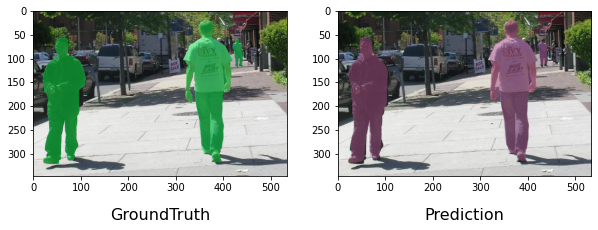

In [20]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_subplot(1, 2, 1)
axes.imshow(masked_test_image)
axes.set_title("GroundTruth", fontsize=16, y=-0.3)
axes = fig.add_subplot(1, 2, 2)
masked_output = gcv.utils.viz.plot_mask(test_image, filtered_output)
axes.imshow(masked_output)
axes.set_title("Prediction", fontsize=16, y=-0.3);

In [10]:
# Quantitative Evaluation
segmentation_metrics = SegmentationMetric(1)

start_time = time.time()

for (X, y) in pedestrian_dataset:
    
    # Format inputs
    image = X
    gt_mask = y
    
    transformed_image = gcv.data.transforms.presets.segmentation.test_transform(image, ctx)    
    
    output = pspnet.predict(transformed_image)
    filtered_output = pedestrian.PedestrianDataset.process_model_mask(output)
    
    segmentation_metrics.update(gt_mask, filtered_output)

metrics = segmentation_metrics.get()
print("PixAcc: ", metrics[0])
print("mIoU  : ", metrics[1])
print("Elapsed Time: ", time.time() - start_time ,"secs")

[18:18:44] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:18:49] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:18:54] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:18:59] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:19:03] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running perf

[18:21:16] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:21:19] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:21:21] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:21:25] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:21:28] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running perf

[18:23:08] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:23:13] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:23:18] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:23:24] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:23:29] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running perf

PixAcc:  0.4650485574278924
mIoU  :  0.5612896701751177
Elapsed Time:  341.7681269645691 secs


In [21]:
deeplab = gcv.model_zoo.get_model('deeplab_resnet152_coco', pretrained=True, ctx=ctx)

In [25]:
output = deeplab.predict(transformed_test_image)

In [26]:
filtered_output = pedestrian.PedestrianDataset.process_model_mask(output)

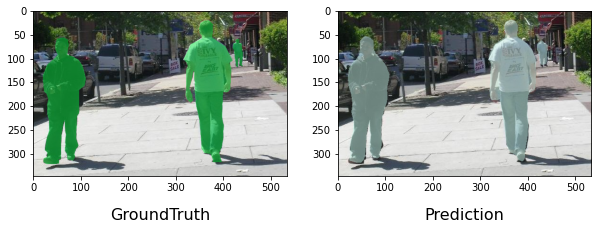

In [27]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_subplot(1, 2, 1)
axes.imshow(masked_test_image)
axes.set_title("GroundTruth", fontsize=16, y=-0.3)
axes = fig.add_subplot(1, 2, 2)
masked_output = gcv.utils.viz.plot_mask(test_image, filtered_output)
axes.imshow(masked_output)
axes.set_title("Prediction", fontsize=16, y=-0.3);

In [15]:
segmentation_metrics = SegmentationMetric(1)

start_time = time.time()

for (X, y) in pedestrian_dataset:
    
    # Format inputs
    image = X
    gt_mask = y
    
    transformed_image = gcv.data.transforms.presets.segmentation.test_transform(image, ctx)    
    
    output = deeplab.predict(transformed_image)
    filtered_output = pedestrian.PedestrianDataset.process_model_mask(output)
    
    segmentation_metrics.update(gt_mask, filtered_output)
    
metrics = segmentation_metrics.get()
print("PixAcc: ", metrics[0])
print("mIoU  : ", metrics[1])
print("Elapsed Time: ", time.time() - start_time ,"secs")

[18:24:27] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:24:32] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:24:35] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:24:39] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[18:24:43] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running perf

PixAcc:  0.4653841191754281
mIoU  :  0.5616023247999165
Elapsed Time:  74.66736197471619 secs
